# Example: Simulation of American Option Price Dynamics using a Binomial Lattice
This example will familiarize students with the simulation of the price dynamics of [American-style option contracts](https://en.wikipedia.org/wiki/Option_style). In particular, we'll explore how the contract length, i.e., the days to expiration (DTE), influences the contract price as a function of the strike price $K$.

### Learning Objectives
* `Prerequisites`: load and interrogate the options chains for different values of the days to expiration (DTE) parameter for an example underlying ticker, in this case, [Advanced Micro Devices](https://finance.yahoo.com/quote/AMD/) with the ticker symbol `AMD.`

## Setup
Set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.
* For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl). 

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-1/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-1/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-1`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-1/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-134/module-1/Manifest.toml`


## Prerequisites
First, load the options chain dataset using the `MyOptionsChainDataSet()` function. This function returns the pricing data as a [Julia Dictionary type](https://docs.julialang.org/en/v1/base/collections/#Dictionaries) with `keys` holding the number of days to expiration `DTE::Int64` and `values` being a [Vector](https://docs.julialang.org/en/v1/base/arrays/#Base.Vector-Tuple{UndefInitializer,%20Any}) of multilevel dictionaries. We'll store the options contract price data in the `dataset` variable.
* In this example, we'll use options pricing data for [Advanced Micro Devices](https://finance.yahoo.com/quote/AMD/) as the underlying asset; [Advanced Micro Devices](https://finance.yahoo.com/quote/AMD/) has the ticker symbol `AMD.` The `dataset` variable holds pricing information for `call` and `put` contracts. Each contract has a different strike price. In addition to the contract price, there is additional information about the underlying asset and contract. 
* For any given `DTE` key, the price data is organized as a `Vector{Dict{String, Any}},` where each element in the vector is a dictionary with the `keys`: `day`, `details`,`last_quote`,`last_trade`,`underlying_asset`,`open_interest` and `break_even_price.` Each key (except for the `open_interest` and `break_even_price` keys) points to another dictionary.

In [2]:
dataset = MyOptionsChainDataSet()

Dict{Int64, Vector{Dict{String, Any}}} with 15 entries:
  123 => [Dict("day"=>Dict{String, Any}("change"=>0, "high"=>79.1, "change_perc…
  60  => [Dict("day"=>Dict{String, Any}("change"=>0, "high"=>73, "change_percen…
  32  => [Dict("day"=>Dict{String, Any}("change"=>0, "high"=>76.7, "change_perc…
  11  => [Dict("day"=>Dict{String, Any}("change"=>0, "high"=>59.05, "change_per…
  368 => [Dict("day"=>Dict{String, Any}("change"=>0, "high"=>81.1, "change_perc…
  578 => [Dict("day"=>Dict{String, Any}(), "details"=>Dict{String, Any}("contra…
  214 => [Dict("day"=>Dict{String, Any}("change"=>0, "high"=>178.6, "change_per…
  732 => [Dict("day"=>Dict{String, Any}(), "details"=>Dict{String, Any}("contra…
  39  => [Dict("day"=>Dict{String, Any}(), "details"=>Dict{String, Any}("contra…
  914 => [Dict("day"=>Dict{String, Any}("change"=>0, "high"=>81.5, "change_perc…
  25  => [Dict("day"=>Dict{String, Any}(), "details"=>Dict{String, Any}("contra…
  151 => [Dict("day"=>Dict{String, Any}("change"=>0, 

For example, we can access the first contract with `DTE = 39 days` to expiration by first passing in the `DTE` key value, followed by the index `1`, i.e., `dataset[39][1]`:

In [3]:
dataset[39];

__Details__: To access the `details` field for the `(DTE, index) = (39,1)` contract (which corresponds to a `put` contract with a strike price of `K = 185.0` USD/share, we can append the `details` key (or any other of the sub-keys) to the end of the dataset call, i.e., `dataset[39][1]["details"]`:

In [4]:
dataset[39][1]["details"]

Dict{String, Any} with 6 entries:
  "contract_type"       => "put"
  "ticker"              => "O:AMD230728P00185000"
  "strike_price"        => 185
  "exercise_style"      => "american"
  "expiration_date"     => "2023-07-28"
  "shares_per_contract" => 100

__Quote__: To access the `last_quote` field for the `(DTE, index) = (39,1)` contract (which corresponds to a `put` contract with a strike price of `K = 185.0` USD/share), we can append the `last_quote` key (or any other of the sub-keys) to the end of the dataset call, i.e., `dataset[39][1]["last_quote"]`:

In [5]:
dataset[39][1]["last_quote"]

Dict{String, Any} with 7 entries:
  "midpoint"     => 64.175
  "ask"          => 65.65
  "timeframe"    => "REAL-TIME"
  "bid_size"     => 10
  "ask_size"     => 1
  "bid"          => 62.7
  "last_updated" => 1686945598063236608

__Underlying__: To access the `underlying_asset` field for the `(DTE, index) = (39,1)` contract (which corresponds to a `put` contract with a strike price of `K = 185.0` USD/share), we can append the `underlying_asset` key (or any other of the sub-keys) to the end of the dataset call, i.e., `dataset[39][1]["underlying_asset"]`:

In [6]:
dataset[39][1]["underlying_asset"]

Dict{String, Any} with 5 entries:
  "timeframe"            => "REAL-TIME"
  "ticker"               => "AMD"
  "price"                => 119.62
  "change_to_break_even" => 1.205
  "last_updated"         => 1686959999095781050

## Task 1: Visualize the trends in the `AMD` options dataset

In [7]:
dataset[11][10]["details"]

Dict{String, Any} with 6 entries:
  "contract_type"       => "put"
  "ticker"              => "O:AMD230630P00162500"
  "strike_price"        => 162.5
  "exercise_style"      => "american"
  "expiration_date"     => "2023-06-30"
  "shares_per_contract" => 100

In [8]:
dataframe_0 = search(dataset, 11, (record::Dict{String, Any}) -> begin

        # initialize -
        should_keep_record = false;
        if (record["details"]["contract_type"] == "put")
            should_keep_record = true
        end;
            
        # return -
        return should_keep_record;
    end
);

In [9]:
dataframe_1 = search(dataset,32, (record::Dict{String, Any}) -> begin

        # initialize -
        should_keep_record = false;

        if (record["details"]["contract_type"] == "put")
            should_keep_record = true
        end;
            
        # return -
        return should_keep_record;
    end
);

In [10]:
dataframe_2 = search(dataset,60, (record::Dict{String, Any}) -> begin

        # initialize -
        should_keep_record = false;

        if (record["details"]["contract_type"] == "put")
            should_keep_record = true
        end;
            
        # return -
        return should_keep_record;
    end
);

In [11]:
dataframe_3 = search(dataset, 123, (record::Dict{String, Any}) -> begin

        # initialize -
        should_keep_record = false;

        if (record["details"]["contract_type"] == "put")
            should_keep_record = true
        end;
            
        # return -
        return should_keep_record;
    end
);

In [12]:
dataframe_1

Row,underlying,strike,type,bid,ask,midpoint
,Float64,Float64,String,Float64,Float64,Float64
1,119.62,200.0,put,77.9,80.65,79.275
2,119.62,195.0,put,72.9,75.65,74.275
3,119.62,190.0,put,69.3,70.5,69.9
4,119.62,185.0,put,64.35,65.55,64.95
5,119.62,180.0,put,59.15,60.65,59.9
6,119.62,175.0,put,54.35,55.65,55.0
7,119.62,170.0,put,49.3,50.5,49.9
8,119.62,165.0,put,44.2,45.55,44.875
9,119.62,160.0,put,39.45,40.65,40.05


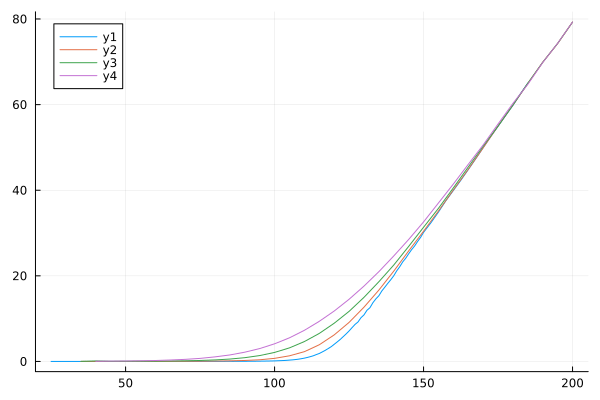

In [15]:
plot(dataframe_0[:,:strike], dataframe_0[:,:midpoint])
plot!(dataframe_1[:,:strike], dataframe_1[:,:midpoint])
plot!(dataframe_2[:,:strike], dataframe_2[:,:midpoint])
plot!(dataframe_3[:,:strike], dataframe_3[:,:midpoint])

## Task 2: Build a lattice model of the `AMD` pricing data

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.